In [1]:
import numpy as np
import pandas as pd

# Data Import and Prep

First we import the data and remove irrelavent columns and convert categorical data to numeric

In [27]:
df = pd.read_csv('data/medical_clean.csv')

predictors = ['Population', 'Income', 'VitD_levels', 'Age', 'Full_meals_eaten', 'Initial_days', 'Children', 'Doc_visits']
outcome = 'TotalCharge'

df = df[['Population', 'Income', 'VitD_levels', 'Initial_days', 'Age', 'Full_meals_eaten', 'Children', 'Doc_visits', 'TotalCharge']]
df.head()

,Population,Income,VitD_levels,Initial_days,Age,Full_meals_eaten,Children,Doc_visits,TotalCharge
0,2951,86575.93,19.141466,10.585770,53,0,1,6,3726.702860
1,11303,46805.99,18.940352,15.129562,51,2,3,4,4193.190458
2,17125,14370.14,18.057507,4.772177,53,1,3,4,2434.234222
3,2162,39741.49,16.576858,1.714879,78,1,0,4,2127.830423
4,5287,1209.56,17.439069,1.254807,22,0,1,5,2113.073274


6921122.221071773


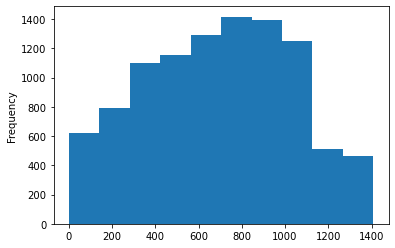

In [17]:
mean_expected_value = df[outcome].mean()
squared_errors = pd.Series(mean_expected_value - df[outcome])**2
SSE = np.sum(squared_errors)
print(SSE)

density_plot = squared_errors.plot(kind='hist')

In [18]:
# def covariance(variable_1, variable_2, bias=0):
#     observations = float(len(variable_1))
#     return np.sum((variable_1 - np.mean(variable_1)) * \
#     (variable_2 - np.mean(variable_2)))/(observations-min(bias,1))

# def standardize(variable):
#     return (variable - np.mean(variable)) / np.std(variable)

# def correlation(var1,var2,bias=0):
#     return covariance(standardize(var1), standardize(var2),bias)

# from scipy.stats.stats import pearsonr

# for c in predictors:
#     print ('Our correlation estimation for %s: %0.5f' % (c, correlation(df[c], df[outcome])))
#     print ('Correlation from Scipy pearsonr estimation: %0.5f' % pearsonr(df[c], df[outcome])[0])
#     print()

In [19]:
# x_range = [df['Initial_days'].min(),df['Initial_days'].max()]
# y_range = [df[outcome].min(),df[outcome].max()]
# scatter_plot = df.plot(kind='scatter', x='Initial_days', y=outcome,xlim=x_range, ylim=y_range)
# meanY = scatter_plot.plot(x_range, [df[outcome].mean(),  df[outcome].mean()], '--' , color='red', linewidth=1)
# meanX = scatter_plot.plot([df['Initial_days'].mean(),df['Initial_days'].mean()], y_range, '--', color='red', linewidth=1)

apply a scaler

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled, columns=df.columns)
df_scaled.head()

,Population,Income,VitD_levels,Initial_days,Age,Full_meals_eaten,Children,Doc_visits,TotalCharge
0,-0.473168,1.615914,0.583603,-0.907310,-0.024795,-0.993387,-0.507129,0.944647,-0.727185
1,0.090242,0.221443,0.483901,-0.734595,-0.121706,0.990609,0.417277,-0.967981,-0.513228
2,0.482983,-0.915870,0.046227,-1.128292,-0.024795,-0.001389,0.417277,-0.967981,-1.319983
3,-0.526393,-0.026263,-0.687811,-1.244503,1.186592,-0.001389,-0.969332,-0.967981,-1.460517
4,-0.315586,-1.377325,-0.260366,-1.261991,-1.526914,-0.993387,-0.507129,-0.011667,-1.467285


We'll save this modified dataset

In [30]:
df_scaled.to_csv('data/medical_scaled.csv')

# Graphs and stuff

Let's look at the correlation

In [31]:
correl = df_scaled.corr()
display(correl)

,Population,Income,VitD_levels,Initial_days,Age,Full_meals_eaten,Children,Doc_visits,TotalCharge
Population,1.000000,0.005426,0.002651,0.017469,-0.018987,-0.025608,0.002462,0.012646,0.019188
Income,0.005426,1.000000,-0.013115,-0.012465,-0.012228,-0.011365,0.007176,0.013464,-0.014345
VitD_levels,0.002651,-0.013115,1.000000,-0.003642,0.010315,0.023223,0.009487,0.010210,-0.001403
Initial_days,0.017469,-0.012465,-0.003642,1.000000,0.016264,-0.017267,0.022467,-0.006754,0.987640
Age,-0.018987,-0.012228,0.010315,0.016264,1.000000,0.008555,0.009836,0.006898,0.016876
Full_meals_eaten,-0.025608,-0.011365,0.023223,-0.017267,0.008555,1.000000,0.003835,-0.002767,-0.014306
Children,0.002462,0.007176,0.009487,0.022467,0.009836,0.003835,1.000000,-0.002292,0.024100
Doc_visits,0.012646,0.013464,0.010210,-0.006754,0.006898,-0.002767,-0.002292,1.000000,-0.005043
TotalCharge,0.019188,-0.014345,-0.001403,0.987640,0.016876,-0.014306,0.024100,-0.005043,1.000000


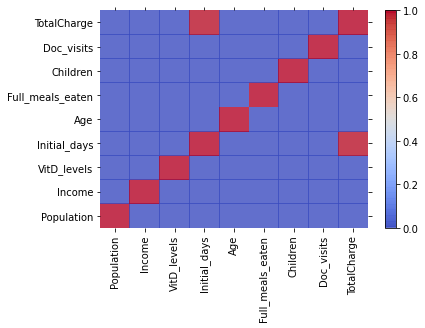

In [32]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

def visualize_correlation_matrix(data, hurdle = 0.0):
    R = np.corrcoef(data, rowvar=0)
    R[np.where(np.abs(R)<hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap=mpl.cm.coolwarm, alpha=0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor=False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor=False)
    heatmap.axes.set_xticklabels(data.columns, minor=False)
    plt.xticks(rotation=90)
    heatmap.axes.set_yticklabels(data.columns, minor=False)
    plt.tick_params(axis='both', which='both', bottom='off', \
    top='off', left = 'off', right = 'off')
    plt.colorbar()
    plt.show()

visualize_correlation_matrix(df_scaled, hurdle=0.5)

# Apply the model

First we run the model with all of our selected features and note the score

In [24]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df_scaled[predictors]
X = sm.add_constant(X)
y = df[outcome].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.80)

regression = LinearRegression()
model = regression.fit(X_train, y_train)
initial_score = model.score(X_test, y_test)
print('Initial Score: %6.5f ' % initial_score)

Initial Score: -0.00227 


Now we'll vary the features used in order to determine the most important features.

In [25]:
regression = LinearRegression()

def score_est(X_train, X_test, y_train, y_test):
    model = regression.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    return score

score_impact = list()

for i in range(len(X.columns)):
    selection = [j for j in range(len(X.columns)) if i != j]
    score_impact.append(((score_est(X_train.values, X_test.values, y_train, y_test) - 
                        score_est(X_train.values[:,selection], X_test.values[:,selection], 
                              y_train, y_test)), X.columns[i]))

reduced_predictors = []
    
for imp, varname in sorted(score_impact, reverse=True):
    if imp >=.01:
        reduced_predictors.append(varname)
    print('%6.5f %s' % (imp, varname))

print('Using new predictor set: ')
print(reduced_predictors)

0.00058 Children
0.00009 Population
0.00000 const
-0.00007 VitD_levels
-0.00013 Doc_visits
-0.00017 Full_meals_eaten
-0.00092 Age
-0.00130 Income
Using new predictor set: 
[]


We rebuild the model with the new reduced feature set and see how the score changed.

In [12]:
X_reduced = X[reduced_predictors]

X_train_reduced = X_train[reduced_predictors]
X_test_reduced = X_test[reduced_predictors]

regression = LinearRegression()
model = regression.fit(X_train_reduced, y_train)
new_score = model.score(X_test_reduced, y_test)
print('New Score: %6.5f' % new_score)
print('Change: %6.5f' % (new_score - initial_score))

New Score: 1.00000
Change: 0.00000


In [13]:
import statsmodels.api as sm

# Xc = sm.add_constant(X)
ols_model = sm.OLS(y, X)
results = ols_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.194e+33
Date:                Mon, 28 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:15:41   Log-Likelihood:             2.9827e+05
No. Observations:               10000   AIC:                        -5.965e+05
Df Residuals:                    9991   BIC:                        -5.965e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               34.4553   2.69e-16   1.28e+17      0.000      34.455      34.455
Population        1.088e-14   2.69e-16     40.384      0.000    1.04e-14    1.14e-14
Income            1.228e-15   2.69e-16      4.560      0.000       7e-16    1.76e-15
VitD_levels      -1.721e-15   2.69e-16     -6.389      0.000   -2.25e-15   -1.19e-15
Initial_days        26.3080   2.69e-16   9.76e+16      0.000      26.308      26.308
Age               1.467e-14   2.69e-16     54.445      0.000    1.41e-14    1.52e-14
Full_meals_eaten -2.387e-15   2.69e-16     -8.859      0.000   -2.92e-15   -1.86e-15
Children          9.992e-15   2.69e-16     37.101      0.000    9.46e-15    1.05e-14
Doc_visits       -2.054e-15   2.69e-16     -7.627      0.000   -2.58e-15   -1.53e-15
==============================================================================
Omnibus:                      306.279   Durbin-Watson:                   1.319
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              334.679
Skew:                          -0.437   Prob(JB):                     2.12e-73
Kurtosis:                       3.194   Cond. No.                         1.05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
corr = np.corrcoef(X, rowvar=0)
eigenvalues, eigenvectors = np.linalg.eig(corr)
for i in range(len(eigenvalues)):
    print(X.columns[i], eigenvalues[i])
#     if eigenvalues[i] > 1:
#         print(X.columns[i])
        

/Users/curtishammons/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/curtishammons/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


LinAlgError: Array must not contain infs or NaNs